In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

* create a dataframe where each user of the test group has the average difference, number of pageviews and number of commits
* do not take project1 into account for calculations of the average difference and the number of commits
* take the number of commits from the checker table
* the figsize is still the same, you can choose whatever fontsize you like as well as the color palette
* the size of the dots should be 200
* the width of the lines of the diagonal graphs (kde) should be 3

In [14]:
ab_test = pd.read_csv('../../data/ab-test.csv')
ab_test = ab_test[ab_test['group'] == 'test'][['uid', 'diff']]
ab_test = ab_test.rename(columns={'diff' : 'avg_diff'})
ab_test

,uid,avg_diff
0,user_1,-103.333333
1,user_1,-6.000000
2,user_18,-10.000000
3,user_18,-3.500000
4,user_19,-82.333333
5,user_19,-148.000000
6,user_21,-78.500000
7,user_21,-112.500000
8,user_25,-127.500000
9,user_25,-69.333333


In [16]:
connection = sqlite3.connect("../../data/checking-logs.sqlite")

commits = pd.read_sql("SELECT uid FROM checker " \
"WHERE uid LIKE 'user_%' AND labname NOT LIKE 'project1'", connection)

pageviews = pd.read_sql("SELECT uid FROM pageviews " \
"WHERE uid LIKE 'user_%' ", connection)

connection.close()

In [17]:
commits = pd.DataFrame(commits.groupby('uid').size()).reset_index().rename(columns={0 : 'num_commits'})
pageviews = pd.DataFrame(pageviews.groupby('uid').size()).reset_index().rename(columns={0 : 'pageviews'})

In [18]:
res = ab_test.merge(pageviews, on='uid', how='inner')
res = res.merge(commits, on = 'uid', how='inner')
res

,uid,avg_diff,pageviews,num_commits
0,user_1,-103.333333,28,62
1,user_1,-6.000000,28,62
2,user_18,-10.000000,3,5
3,user_18,-3.500000,3,5
4,user_19,-82.333333,16,118
5,user_19,-148.000000,16,118
6,user_21,-78.500000,10,65
7,user_21,-112.500000,10,65
8,user_25,-127.500000,179,79
9,user_25,-69.333333,179,79


array([[<Axes: xlabel='avg_diff', ylabel='avg_diff'>,
        <Axes: xlabel='pageviews', ylabel='avg_diff'>,
        <Axes: xlabel='num_commits', ylabel='avg_diff'>],
       [<Axes: xlabel='avg_diff', ylabel='pageviews'>,
        <Axes: xlabel='pageviews', ylabel='pageviews'>,
        <Axes: xlabel='num_commits', ylabel='pageviews'>],
       [<Axes: xlabel='avg_diff', ylabel='num_commits'>,
        <Axes: xlabel='pageviews', ylabel='num_commits'>,
        <Axes: xlabel='num_commits', ylabel='num_commits'>]], dtype=object)

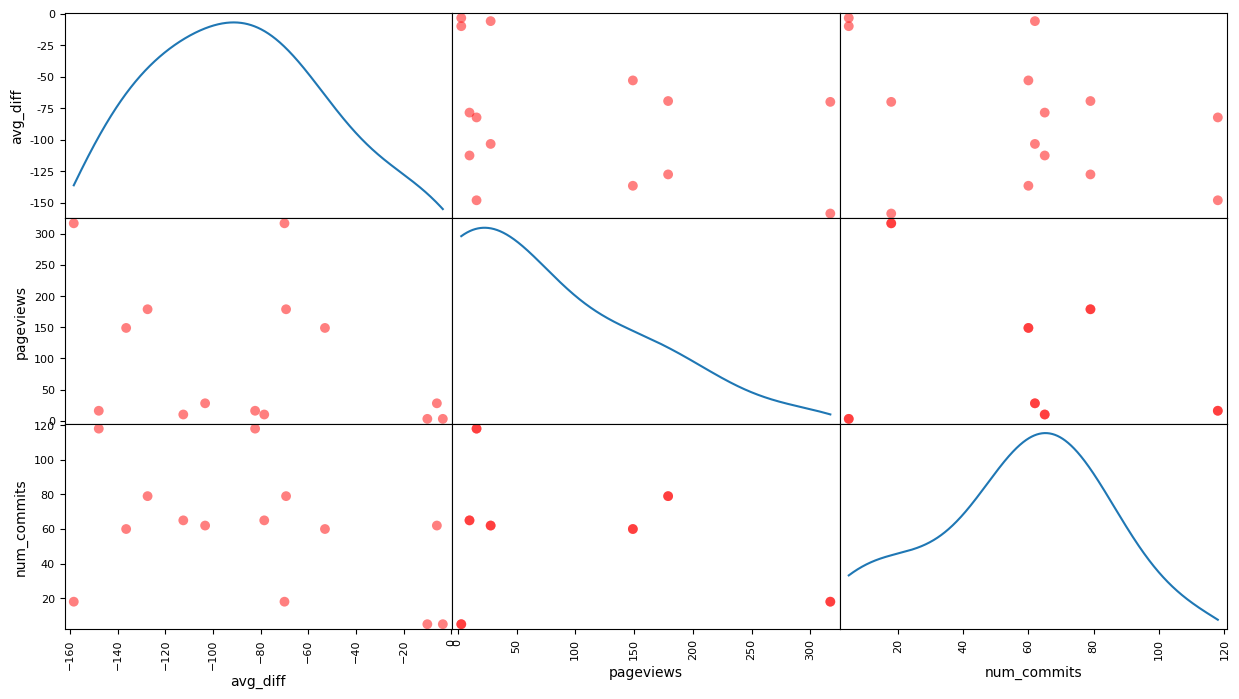

In [28]:
scatter_matrix(res, figsize=(15, 8), diagonal='kde', linewidth=3, s=200, color='red')

at the end of your Jupyter Notebook, create a markdown cell and insert the questions:
* “Can we say that if a user has a low number of pageviews then they likely have a low number of commits?” The answer: yes or no.
* “Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?” The answer: yes or no.
* “Can we say that there are many users with a low number of commits and a few with a high number of commits”? The answer: yes or no.
* “Can we say that there are many users with a small average difference and a few with a large average difference”? The answer: yes or no.

1) no, тк корреляция отрицательная  
2) no, тк корреляция отрицательная  
3) yes, тк среднее значение лежит ближе к min, чем к max   
4) no, тк среднее значение ближе к min( а то есть абсолютный максимум, так как значения отрицательные)  


In [30]:
res['pageviews'].corr(res['num_commits'])

np.float64(-0.2868372295098113)

In [31]:
res['pageviews'].corr(res['avg_diff'])

np.float64(-0.3672434515505602)

In [36]:
res['num_commits'].min(), res['num_commits'].mean(), res['num_commits'].max()

(np.int64(5), np.float64(58.142857142857146), np.int64(118))

In [35]:
res['avg_diff'].min(), res['avg_diff'].mean(), res['avg_diff'].max()

(np.float64(-158.5), np.float64(-82.78571428571429), np.float64(-3.5))